#Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

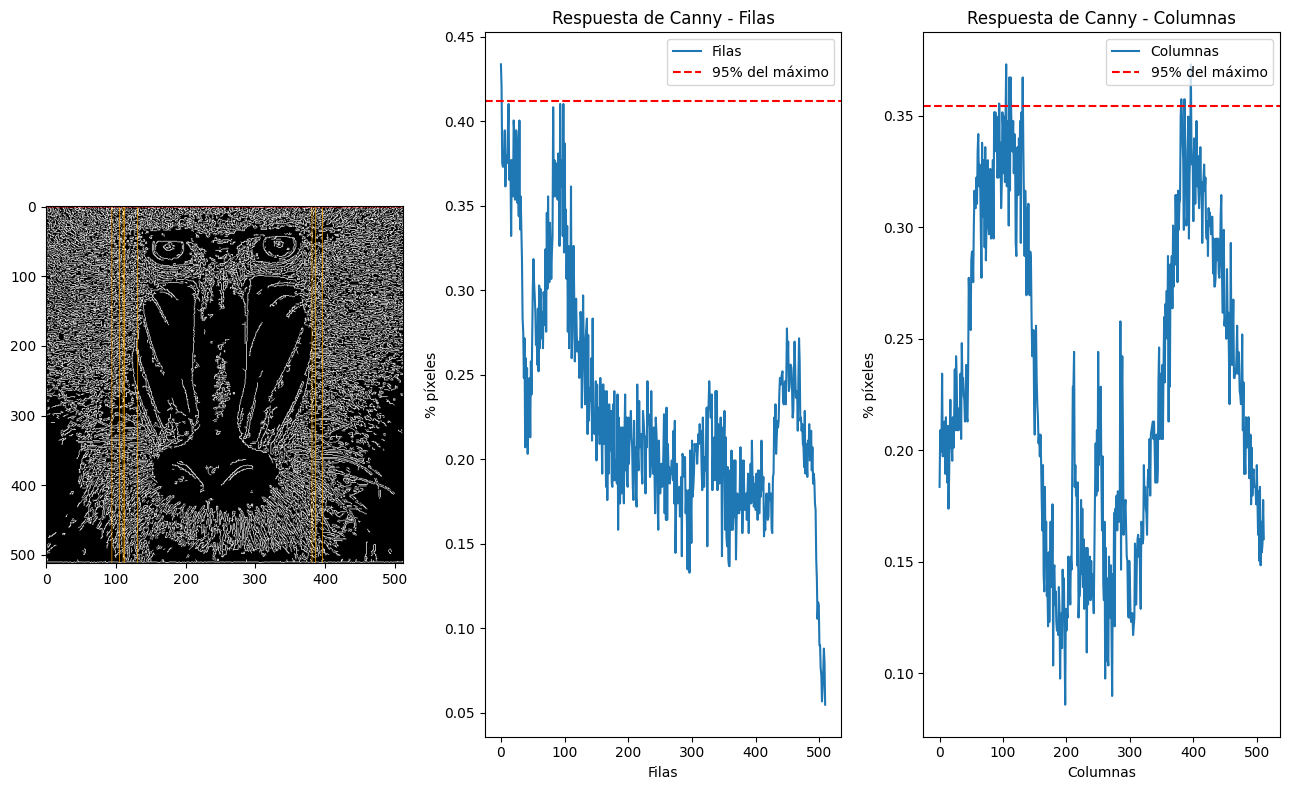

Máximo para filas: 0.43359375
Máximo para columnas: 0.373046875
Número de valores iguales o por encima del 95% del máximo para filas: 2
Número de valores iguales o por encima del 95% del máximo para columnas: 8


In [3]:
#Obtiene contornos con el operador de Canny
img = cv2.imread('mandril.jpg') 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])


# Calcula la cuenta de píxeles blancos (255) por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al número de columnas y al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por fila
rows = row_counts[:-2, 0] / (255 * canny.shape[1])

# Encuentra el máximo valor para filas y columnas
max_value_rows = max(rows)
max_value_cols = max(cols)

# Encuentra el número de valores que superan el 95% del máximo para filas y columnas
threshold_rows = 0.95 * max_value_rows
threshold_cols = 0.95 * max_value_cols

num_values_above_threshold_rows = sum(rows >= threshold_rows)
num_values_above_threshold_cols = sum(cols >= threshold_cols)

# Crea dos subplots para filas y columnas
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(13, 8))

#Graficos Imagen

# Crear una copia de la imagen de Canny para resaltado
canny_highlighted = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)

# Resalta las filas por encima del 95% del máximo en rojo
for i, value in enumerate(rows):
    if value >= threshold_rows:
        canny_highlighted[i, :, :] = [0, 0, 255]  # Rojo (BGR)

# Resalta las columnas por encima del 95% del máximo en naranja
for j, value in enumerate(cols):
    if value >= threshold_cols:
        canny_highlighted[:, j, :] = [0, 165, 255]  # Naranja (BGR)

ax0.imshow(cv2.cvtColor(canny_highlighted, cv2.COLOR_BGR2RGB))



# Gráfico para filas
ax1.plot(rows, label="Filas")
ax1.axhline(y=threshold_rows, color='r', linestyle='--', label="95% del máximo")
ax1.legend()
ax1.set_xlabel("Filas")
ax1.set_ylabel("% píxeles")
ax1.set_title("Respuesta de Canny - Filas")

# Gráfico para columnas
ax2.plot(cols, label="Columnas")
ax2.axhline(y=threshold_cols, color='r', linestyle='--', label="95% del máximo")
ax2.legend()
ax2.set_xlabel("Columnas")
ax2.set_ylabel("% píxeles")
ax2.set_title("Respuesta de Canny - Columnas")

plt.tight_layout()
plt.show()

# Imprime los resultados
print("Máximo para filas:", max_value_rows)
print("Máximo para columnas:", max_value_cols)
print("Número de valores iguales o por encima del 95% del máximo para filas:", num_values_above_threshold_rows)
print("Número de valores iguales o por encima del 95% del máximo para columnas:", num_values_above_threshold_cols)




TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

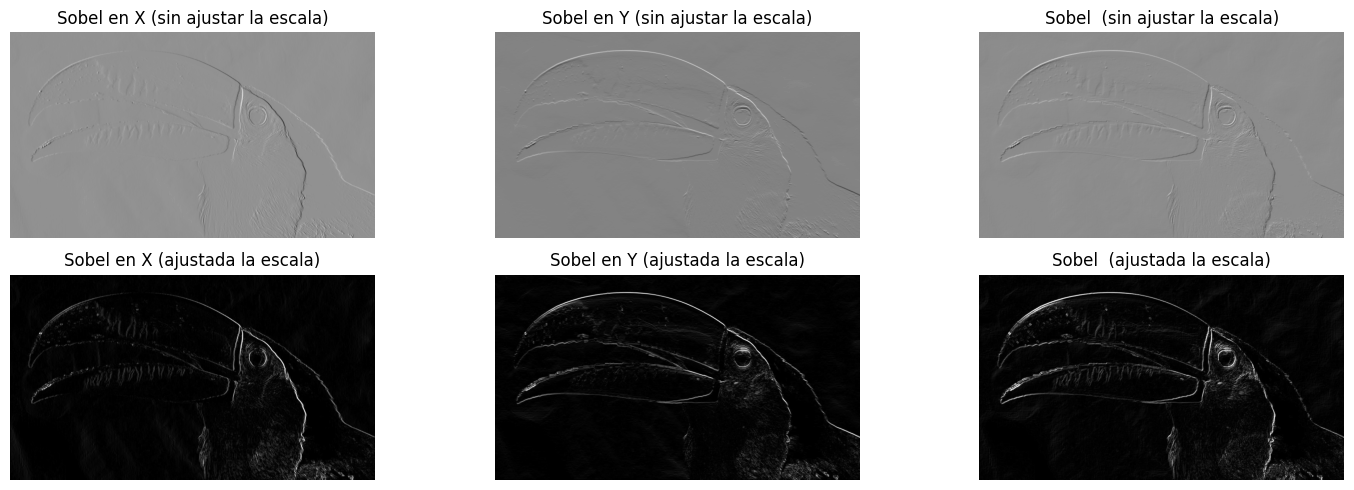

In [4]:
# Cargar una imagen (reemplaza 'nombre_de_la_imagen.jpg' con la ruta de tu imagen)
imagen = cv2.imread('98.jpg', cv2.IMREAD_GRAYSCALE)  # Lee la imagen en escala de grises

# Aplicar suavizado Gaussiano para suavizar la imagen
imagen_suavizada = cv2.GaussianBlur(imagen, (3, 3), 0)

# Calcular los gradientes en ambas direcciones (horizontal y vertical) con Sobel
sobelx = cv2.Sobel(imagen_suavizada, cv2.CV_64F, 1, 0)  # Gradiente en dirección x (horizontal)
sobely = cv2.Sobel(imagen_suavizada, cv2.CV_64F, 0, 1)  # Gradiente en dirección y (vertical)

# Combinar ambos resultados de Sobel para obtener el gradiente total
gradiente_total = cv2.add(sobelx, sobely)

# Ajustar la escala de las imágenes de Sobel
sobelx_scaled = cv2.convertScaleAbs(sobelx)
sobely_scaled = cv2.convertScaleAbs(sobely)
gradiente_total_scaled = cv2.convertScaleAbs(gradiente_total)

# Mostrar las imágenes resultantes
plt.figure(figsize=(15, 5))


# Imagen de Sobel (sin ajustar la escala) en dirección x (horizontal)
plt.subplot(2, 3, 1)
plt.axis("off")
plt.title('Sobel en X (sin ajustar la escala)')
plt.imshow(sobelx, cmap='gray')

# Imagen de Sobel (ajustada la escala) en dirección x (horizontal)
plt.subplot(2, 3, 4)
plt.axis("off")
plt.title('Sobel en X (ajustada la escala)')
plt.imshow(sobelx_scaled, cmap='gray')

# Imagen de Sobel (sin ajustar la escala) en dirección y (vertical)
plt.subplot(2, 3, 2)
plt.axis("off")
plt.title('Sobel en Y (sin ajustar la escala)')
plt.imshow(sobely, cmap='gray')

# Imagen de Sobel (ajustada la escala) en dirección y (vertical)
plt.subplot(2, 3, 5)
plt.axis("off")
plt.title('Sobel en Y (ajustada la escala)')
plt.imshow(sobely_scaled, cmap='gray')


# Imagen de Sobel (sin ajustar la escala) en ambas direcciones
plt.subplot(2, 3, 3)
plt.axis("off")
plt.title('Sobel  (sin ajustar la escala)')
plt.imshow(gradiente_total, cmap='gray')

# Imagen de Sobel (ajustada la escala) en ambas direcciones
plt.subplot(2, 3, 6)
plt.axis("off")
plt.title('Sobel  (ajustada la escala)')
plt.imshow(gradiente_total_scaled, cmap='gray')


plt.tight_layout()
plt.show()


TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

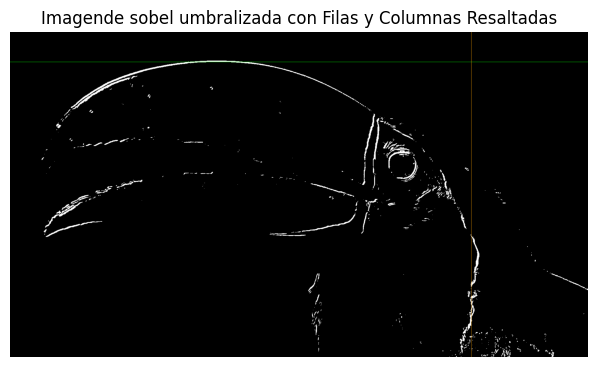

Resultados obtenidos a partir de Sobel:
Máximo para filas: 198
Máximo para columnas: 99
Número de valores iguales o por encima del 95% del máximo para filas: 1
Número de valores iguales o por encima del 95% del máximo para columnas: 1


In [5]:

# Convertir a 8 bits (valores entre 0 y 255)
sobel8 = np.uint8(gradiente_total_scaled)

# Aplicar umbralizado a la imagen de Sobel
umbral = 100  # Puedes ajustar este umbral según tus necesidades
sobel_umbralizado = cv2.threshold(sobel8, umbral, 255, cv2.THRESH_BINARY)[1]

# Conteo de píxeles blancos por filas y columnas
filas_blancas = np.sum(sobel_umbralizado == 255, axis=1)
columnas_blancas = np.sum(sobel_umbralizado == 255, axis=0)

# Calcular el máximo tanto para filas como para columnas
maximo_filas = np.max(filas_blancas)
maximo_columnas = np.max(columnas_blancas)

# Calcular el umbral para filas y columnas
umbral_filas = 0.95 * maximo_filas
umbral_columnas = 0.95 * maximo_columnas

# Filas por encima del 0.95 del máximo
filas_destacadas = np.where(filas_blancas >= umbral_filas)[0]

# Columnas por encima del 0.95 del máximo
columnas_destacadas = np.where(columnas_blancas >= umbral_columnas)[0]

# Crear una copia de la imagen original en color para resaltado
imagen_resaltada = cv2.cvtColor(sobel_umbralizado, cv2.COLOR_GRAY2BGR)

# Resaltar las filas en rojo
for fila in filas_destacadas:
    imagen_resaltada[fila, :, :] = [0, 255, 0]  # verde (BGR)

# Resaltar las columnas en naranja
for columna in columnas_destacadas:
    imagen_resaltada[:, columna, :] = [0, 165, 255]  # Naranja (BGR)

# Mostrar la imagen original y la imagen con filas y columnas resaltadas
plt.figure(figsize=(12, 6))


# Imagen con filas y columnas resaltadas
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title('Imagende sobel umbralizada con Filas y Columnas Resaltadas')
plt.imshow(cv2.cvtColor(imagen_resaltada, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

# Comparar los resultados obtenidos a partir de Sobel y Canny
print("Resultados obtenidos a partir de Sobel:")
print("Máximo para filas:", maximo_filas)
print("Máximo para columnas:", maximo_columnas)
print("Número de valores iguales o por encima del 95% del máximo para filas:", len(filas_destacadas))
print("Número de valores iguales o por encima del 95% del máximo para columnas:", len(columnas_destacadas))


Webcam y sustracción de fotogramas

In [6]:
vid = cv2.VideoCapture(0)

#Marca de inicio
disponible = 0 
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if disponible > 0:
            dif = cv2.absdiff(frame, pframe)        
            # Muestra resultado
            cv2.imshow('Diferencia', dif)        

        else:
            disponible = 1

        #Copia fotograma actual despuses cirbu la diferencia en el siguiente forograma.
        pframe = frame.copy()
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Webcam y sustracción de modelo del fondo

In [86]:
vid = cv2.VideoCapture(0)


# Fondo
# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
  


while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)

        
        #Con un segundo parámerto se puede definir máscara con zonas a actualizar
        objetos = eliminadorFondo.apply(framem)
        #objetos = eliminadorFondo.apply(framem, objetos, 0)  #No actualiza el fondo
        # Obtiene fondo
        background = eliminadorFondo.getBackgroundImage()

        # Muestra resultado
        cv2.imshow('Fotograma', objetos)
        # Muestra fondo
        cv2.imshow('Fondo', background)
  
   
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


TAREA: Asumiendo que quieren mostrar a personas que no forman parte del curso de VC el comportamiento de una o varias funcioens de las vistas hasta este momento aplicadas sobre la entrada de la webcam. ¿Cuál(es) escogerían?

Algunos de los comportamientos aplicadas sobre la webcam pueden ser:

1.Detección de bordes con Sobel y Canny: Puedes mostrar cómo las funciones de detección de bordes de Sobel y Canny resaltan los bordes de objetos en la imagen de la webcam en tiempo real.

2.Filtrado en tiempo real: Experimenta con diferentes umbrales y métodos de umbralización para resaltar características específicas en la imagen de la webcam mientras se actualiza en tiempo real.

3.**Seguimiento de objetos en tiempo real y contorneado**: Implementa un sistema de seguimiento de objetos en la imagen de la webcam utilizando las funciones de conteo y umbralización. Muestra cómo el sistema puede seguir objetos en movimiento.

4.Comparación de resultados: Muestra y compara los resultados obtenidos a partir de las funciones de Sobel y Canny en tiempo real. Destaca las diferencias en la detección de bordes y cómo se comportan en diferentes escenarios.

5.Superposición de información en tiempo real: Agrega información adicional, como coordenadas de objetos detectados o valores de píxeles relevantes, superpuestos en la imagen de la webcam en tiempo real.

En nustro caso nos decantamos por el seguimiento de objetos

In [7]:
import cv2
import numpy as np

# Inicializa la captura de video desde la cámara (puedes cambiar el argumento para usar otra cámara si es necesario)
cap = cv2.VideoCapture(0)

while True:
    # Captura un fotograma desde la cámara
    ret, frame = cap.read()

    # Convierte el fotograma a espacio de color HSV (Matiz-hue, Saturación, Valor), modelo de representación de colores
    # es útil en muchas aplicaciones, ya que separa la información de color de una manera que a menudo es más intuitiva y fácil de procesar que otros espacios de color como RGB.
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define el rango de color para el negro en el espacio de color HSV
    lower_black = np.array([0, 0, 0])
    upper_black = np.array([179, 255, 30])

    # Crea una máscara para el rango de color (máscara binaria)
    mask = cv2.inRange(hsv, lower_black, upper_black)

    # Aplica umbralización a la máscara
    _, thresholded_mask = cv2.threshold(mask, 50, 255, cv2.THRESH_BINARY)

    # Aplica el operador de Canny para detectar bordes en la imagen original
    edges = cv2.Canny(frame, 100, 200) 

    # Redimensiona la imagen de Canny para que tenga las mismas dimensiones que la imagen original
    edges_resized = cv2.resize(edges, (frame.shape[1], frame.shape[0]))

    # Convierte la imagen Canny en una imagen en color (BGR) asignando el canal a todos los canales de color
    edges_bgr = cv2.cvtColor(edges_resized, cv2.COLOR_GRAY2BGR)

    # Encuentra los contornos en la máscara umbralizada
    contours, _ = cv2.findContours(thresholded_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        # Calcula el área del contorno
        area = cv2.contourArea(contour)

        # Ignora contornos pequeños (ajusta el valor según tus necesidades)
        if area < 200:
            continue

        # Calcula el centroide del contorno
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        # Dibuja el contorno y el centroide en el fotograma original
        cv2.drawContours(frame, [contour], -1, (0, 255, 0), 2)  # Dibuja el contorno en verde
        cv2.circle(frame, (cX, cY), 5, (0, 0, 255), -1)  # Dibuja el centroide en rojo

    # Concatena la imagen original con la imagen Canny convertida en color (BGR)
    result = np.hstack([frame, edges_bgr])

    # Muestra el resultado
    cv2.imshow("Seguimiento de Objetos Oscuros con Bordes de Canny", result)

    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera la captura de video y cierra todas las ventanas
cap.release()
cv2.destroyAllWindows()


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) propongan (los componentes de cada grupo) una reinterpretación del procesamiento de imágenes con las técnicas vistas o que conozcan.

En este caso vamos a crear una demo llamada  Virtual Artistic Mirror:

Utiliza el fondo eliminado por el algoritmo de sustracción de fondo para crear un lienzo virtual.
Implementa un conjunto de pinceles virtuales que permitan a los usuarios "pintar" en el lienzo con gestos y movimientos capturados por la cámara.
Los colores y trazos podrían estar relacionados con la velocidad del movimiento de las manos o los objetos detectados en la imagen.
Agrega efectos artísticos y filtros para transformar la obra maestra virtual.

### Movimiento General

In [12]:
import cv2
import numpy as np

# Inicializar la cámara
vid = cv2.VideoCapture(0)

# Inicializar el eliminador de fondo
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

# Tamaño del lienzo virtual
canvas = np.zeros((480, 640, 3), dtype=np.uint8)

# Color de dibujo inicial (rojo)
color = (0, 0, 255)

while True:
    # Captura el fotograma actual
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo al fotograma
        frame = cv2.flip(frame, 1)

        # Aplica el eliminador de fondo
        objetos = eliminadorFondo.apply(frame)

        # Obtiene el fondo
        background = eliminadorFondo.getBackgroundImage()

        # Dibuja sobre el lienzo virtual cuando se detecta un objeto (por ejemplo, una mano)
        if np.any(objetos):
            contours, _ = cv2.findContours(objetos, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            for contour in contours:
                if cv2.contourArea(contour) > 1000:  # Filtro para evitar pequeños contornos
                    x, y, w, h = cv2.boundingRect(contour)
                    cv2.rectangle(frame, (x, y), (x + w, y + h), color, thickness=2)
                    cv2.rectangle(canvas, (x, y), (x + w, y + h), color, thickness=2)

        # Cambia el color de dibujo con las teclas 'r', 'g', 'b'
        key = cv2.waitKey(1) & 0xFF
        if key == ord('r'):
            color = (0, 0, 255)  # Rojo
        elif key == ord('g'):
            color = (0, 255, 0)  # Verde
        elif key == ord('b'):
            color = (255, 0, 0)  # Azul

        # Muestra el resultado
        cv2.imshow('Fotograma', frame)
        cv2.imshow('Lienzo Virtual', canvas)

    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera la cámara y cierra las ventanas
vid.release()
cv2.destroyAllWindows()


### Movimiento De Objeto amarillo

In [13]:
import cv2
import numpy as np

# Inicializar la cámara
vid = cv2.VideoCapture(0)

# Tamaño del lienzo virtual
canvas = np.zeros((480, 640, 3), dtype=np.uint8)

# Color de dibujo inicial (rojo)
color = (0, 0, 255)

# Variable para rastrear la última posición de la mano
prev_x, prev_y = 0, 0

while True:
    # Captura el fotograma actual
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo al fotograma
        frame = cv2.flip(frame, 1)

        # Convierte el fotograma a espacio de color HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Define un rango de colores amarillos en HSV
        lower_yellow = np.array([20, 100, 100])
        upper_yellow = np.array([40, 255, 255])

        # Filtra los píxeles amarillos en el rango definido
        mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

        # Encuentra los contornos de los objetos amarillos
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            for contour in contours:
                if cv2.contourArea(contour) > 1000:  # Filtro para evitar pequeños contornos
                    moments = cv2.moments(contour)
                    if moments['m00'] != 0:
                        x = int(moments['m10'] / moments['m00'])
                        y = int(moments['m01'] / moments['m00'])

                        # Dibuja una línea suave desde la posición anterior a la posición actual
                        cv2.line(frame, (prev_x, prev_y), (x, y), color, thickness=5)
                        cv2.line(canvas, (prev_x, prev_y), (x, y), color, thickness=5)

                        prev_x, prev_y = x, y

        # Cambia el color de dibujo con las teclas 'r', 'g', 'b'
        key = cv2.waitKey(1) & 0xFF
        if key == ord('r'):
            color = (0, 0, 255)  # Rojo
        elif key == ord('g'):
            color = (0, 255, 0)  # Verde
        elif key == ord('b'):
            color = (255, 0, 0)  # Azul

        # Muestra el resultado
        cv2.imshow('Fotograma', frame)
        cv2.imshow('Lienzo Virtual', canvas)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera la cámara y cierra las ventanas
vid.release()
cv2.destroyAllWindows()
